In [1]:
import tensorflow as tf
import numpy as np
import random
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import sklearn.model_selection as sk

In [2]:
learning_rate = 0.01
training_epochs = 50
batch_size = 100

In [3]:
#read data
xy = np.loadtxt('spambase.csv', delimiter = ',', dtype = np.float32)
x_data = xy[:,0:-1]
y_data = xy[:,[-1]]

nb_classes = 2

print(x_data.shape, x_data, len(x_data))
print(y_data.shape, y_data, len(y_data))

(4601, 57) [[  1.20000004e-05   0.00000000e+00   2.40000008e-05 ...,   1.50431995e-04
    1.32567401e-03   1.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   1.51234772e-02
    6.30578876e-01   6.35187149e-01]
 [  1.82999993e-05   2.53000007e-06   2.53000007e-06 ...,   7.78486021e-04
    7.39220977e-02   5.78435719e-01]
 ..., 
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   6.31000003e-05
    6.31000003e-05   6.31000003e-05]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   6.31000003e-05
    6.31000003e-05   6.31000003e-05]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   6.31000003e-05
    6.31000003e-05   6.31000003e-05]] 4601
(4601, 1) [[ 1.]
 [ 1.]
 [ 1.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]] 4601


(3220, 57) [[  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   1.99987000e-04
    9.46910004e-04   2.14001648e-02]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   1.25496997e-04
    1.51505601e-03   1.12997917e-02]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   3.84509010e-04
    5.23956819e-03   3.34574841e-02]
 ..., 
 [  0.00000000e+00   0.00000000e+00   9.41000035e-05 ...,   1.26255007e-04
    5.05018979e-04   3.15636606e-03]
 [  0.00000000e+00   0.00000000e+00   9.47000008e-05 ...,   1.15711999e-04
    5.05018979e-04   1.38880103e-03]
 [  0.00000000e+00   3.46999987e-05   3.46999987e-05 ...,   1.06218003e-03
    9.34284460e-03   2.44302768e-02]]
(1381, 57) [[  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   6.31000003e-05
    6.31000003e-05   1.64131098e-03]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   6.31000003e-05
    6.31000003e-05   3.15637008e-04]
 [  0.00000000e+00   0.00000000e+00   7.39000025e-05 ...,   1.24612998e-04

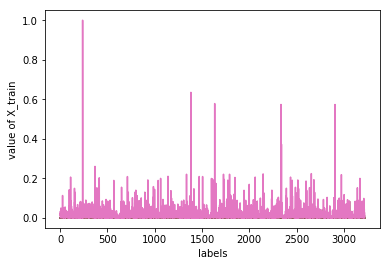

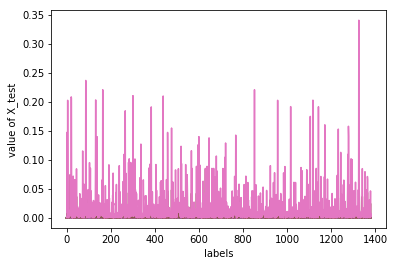

In [4]:
#dataset with matplot
X_train, X_test, Y_train, Y_test = sk.train_test_split(x_data,y_data,test_size=0.3, random_state = 42)
print(X_train.shape,X_train)
print(X_test.shape,X_test)
print(Y_train.shape,Y_train)
print(Y_test.shape,Y_test)

plt.plot(X_train)
plt.xlabel("labels")
plt.ylabel("value of X_train")
plt.show()

plt.plot(X_test)
plt.xlabel("labels")
plt.ylabel("value of X_test")
plt.show()

In [5]:
#MLP hiddenLayer
print('making layers')
X = tf.placeholder(tf.float32, [None, 57]) # 57
Y = tf.placeholder(tf.int32, [None, 1]) #0 ~ 1

Y_one_hot = tf.one_hot(Y, nb_classes)
Y_one_hot = tf.reshape(Y_one_hot, [-1, nb_classes])

with tf.name_scope("layer1") as scope:
    W1 = tf.get_variable("W1", shape = [57,28], initializer = tf.contrib.layers.xavier_initializer())
    b1 = tf.Variable(tf.random_normal([28]), name = 'biases1')
    L1 = tf.nn.relu(tf.matmul(X,W1)+ b1)
    
    w1_hist = tf.summary.histogram("W1", W1)
    b1_hist = tf.summary.histogram("biases1", b1)
    layer1_hist = tf.summary.histogram("layer1", L1)

with tf.name_scope("layer2")as scope:
    W2 = tf.get_variable("W2", shape = [28,28], initializer = tf.contrib.layers.xavier_initializer())
    b2 = tf.Variable(tf.random_normal([28]), name = 'biases2')
    L2 = tf.nn.relu(tf.matmul(L1,W2)+ b2)
                   
    w2_hist = tf.summary.histogram("W2", W2)
    b2_hist = tf.summary.histogram("biases2", b2)
    layer2_hist = tf.summary.histogram("layer2", L2)              

with tf.name_scope("layer3")as scope:                   
    W3 = tf.get_variable("W3", shape = [28,28], initializer = tf.contrib.layers.xavier_initializer())
    b3 = tf.Variable(tf.random_normal([28]), name = 'biases3')
    L3 = tf.nn.relu(tf.matmul(L2,W3)+ b3)

    w3_hist = tf.summary.histogram("W3", W3)
    b3_hist = tf.summary.histogram("biases3", b3)
    layer3_hist = tf.summary.histogram("layer3", L3)   
    
with tf.name_scope("layer4")as scope:                
    W4 = tf.get_variable("W4", shape = [28,28], initializer = tf.contrib.layers.xavier_initializer())
    b4 = tf.Variable(tf.random_normal([28]), name = 'biases4')
    L4 = tf.nn.relu(tf.matmul(L3,W4)+ b4)
    
    w4_hist = tf.summary.histogram("W4", W4)
    b4_hist = tf.summary.histogram("biases4", b4)
    layer4_hist = tf.summary.histogram("layer4", L4)  

with tf.name_scope("layer5")as scope:                
    W5 = tf.get_variable("W5", shape = [28,28], initializer = tf.contrib.layers.xavier_initializer())
    b5 = tf.Variable(tf.random_normal([28]), name = 'biases5')
    L5 = tf.nn.relu(tf.matmul(L4,W5)+ b5)
    
    w5_hist = tf.summary.histogram("W5", W5)
    b5_hist = tf.summary.histogram("biases5", b5)
    layer5_hist = tf.summary.histogram("layer5", L5)  
    
with tf.name_scope("layer6")as scope:     
    W6 = tf.get_variable("W6", shape = [28,nb_classes], initializer = tf.contrib.layers.xavier_initializer())
    b6 = tf.Variable(tf.random_normal([nb_classes,]), name = 'biases6')
    hypothesis = tf.matmul(L5, W6) + b6
    
    w6_hist = tf.summary.histogram("W6", W6)
    b6_hist = tf.summary.histogram("biases6", b6)
    hypothesis_hist = tf.summary.histogram("hypothesis", hypothesis)  
    
print('Finish making layers')

making layers
Finish making layers


In [6]:
#cost, optimizer 
print('reducing cost')
with tf.name_scope("cost") as scope:
    cost_i = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=hypothesis, labels = Y_one_hot))
    cost = tf.reduce_mean(cost_i)
    cost_summ = tf.summary.scalar("cost",cost)

with tf.name_scope("train") as scope:
    optimizer = tf.train.AdamOptimizer (learning_rate = learning_rate).minimize(cost)


reducing cost


In [9]:
def next_batch(num, data, labels):
    '''
    Return a total of `num` random samples and labels. 
    '''
    idx = np.arange(0 , len(data))
    
    np.random.shuffle(idx)
    idx = idx[:num]
    data_shuffle = [data[ i] for i in idx]
    labels_shuffle = [labels[ i] for i in idx]

    return np.asarray(data_shuffle), np.asarray(labels_shuffle)

In [10]:
#training
print('training start')
sess = tf.Session()

merged_summary = tf.summary.merge_all()
writer = tf.summary.FileWriter("./logs/xor_logs")
writer.add_graph(sess.graph)

sess.run(tf.global_variables_initializer())

for epoch in range(training_epochs): 
    summary, _ = sess.run([merged_summary, optimizer], feed_dict = {X: X_train, Y: Y_train})
    avg_cost = 0
    total_batch = int(x_data.shape[0]/batch_size)
    
    for i in range(total_batch):
        batch_xs,batch_ys = next_batch(batch_size, x_data, y_data)
    
        feed_dict = {X: batch_xs, Y: batch_ys}
        c, _ = sess.run([cost, optimizer], feed_dict = feed_dict)
        avg_cost += c/ total_batch
        
    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning Finished!')


training start
Epoch: 0001 cost = 0.703792417
Epoch: 0002 cost = 0.671762991
Epoch: 0003 cost = 0.667622539
Epoch: 0004 cost = 0.632148629
Epoch: 0005 cost = 0.635286224
Epoch: 0006 cost = 0.594013004
Epoch: 0007 cost = 0.609013844
Epoch: 0008 cost = 0.593637472
Epoch: 0009 cost = 0.560131284
Epoch: 0010 cost = 0.552288391
Epoch: 0011 cost = 0.557346916
Epoch: 0012 cost = 0.566854172
Epoch: 0013 cost = 0.525294627
Epoch: 0014 cost = 0.556226269
Epoch: 0015 cost = 0.534598886
Epoch: 0016 cost = 0.537967971
Epoch: 0017 cost = 0.546247688
Epoch: 0018 cost = 0.510346139
Epoch: 0019 cost = 0.491421853
Epoch: 0020 cost = 0.503980975
Epoch: 0021 cost = 0.495945426
Epoch: 0022 cost = 0.473378796
Epoch: 0023 cost = 0.471362647
Epoch: 0024 cost = 0.478202675
Epoch: 0025 cost = 0.436809240
Epoch: 0026 cost = 0.442555615
Epoch: 0027 cost = 0.417104864
Epoch: 0028 cost = 0.392623969
Epoch: 0029 cost = 0.374405048
Epoch: 0030 cost = 0.501836794
Epoch: 0031 cost = 0.391102182
Epoch: 0032 cost = 0.394

In [11]:
#testing
print('start test')
correct_prediction = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y_one_hot,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
with tf.name_scope("accuracy") as scope:
    accuracy_summ = tf.summary.scalar("accuracy", accuracy)

print('Accuracy:', sess.run(accuracy, feed_dict = {X: X_test, Y: Y_test}))
print('test finished')
#confusion matrix

confusion = tf.confusion_matrix(labels = Y_test
                                , predictions = correct_prediction, num_classes = nb_classes,dtype =tf.float32, name = None)

test_confusion = sess.run(confusion, feed_dict ={X: X_test, Y: Y_test})
print(test_confusion)

start test
Accuracy: 0.85735
test finished
[[  91.  745.]
 [ 106.  439.]]


TP 439.0
TN 745.0
FP 91.0
FN 106.0


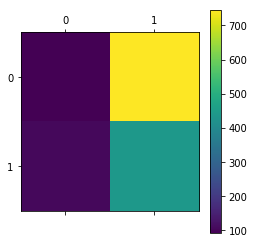

Precision:  0.828302
Recall:  0.805505


In [12]:
#precision 구하는 공식
argmax_prediction = tf.argmax(hypothesis, 1)
argmax_y = tf.argmax(Y_one_hot, 1)

TP = tf.count_nonzero(argmax_prediction * argmax_y, dtype=tf.float32)
TN = tf.count_nonzero((argmax_prediction - 1) * (argmax_y - 1), dtype=tf.float32)
FP = tf.count_nonzero(argmax_prediction * (argmax_y - 1), dtype=tf.float32)
FN = tf.count_nonzero((argmax_prediction - 1) * argmax_y, dtype=tf.float32)

print('TP',sess.run(TP,feed_dict={X: X_test, Y: Y_test}))
print('TN',sess.run(TN,feed_dict={X: X_test, Y: Y_test}))
print('FP',sess.run(FP,feed_dict={X: X_test, Y: Y_test}))
print('FN',sess.run(FN,feed_dict={X: X_test, Y: Y_test}))

plt.matshow(test_confusion)
plt.colorbar()
plt.show()

precision = sess.run(TP/(TP+FP),feed_dict={X: X_test, Y: Y_test})
recall = sess.run(TP/(TP+FN),feed_dict={X: X_test, Y: Y_test})

print('Precision: ',precision)
        
print('Recall: ',recall)
